# **CONVULUTION NEURAL NEWORK - COLOUR IMAGES(RGB).** 


## **Training and testing the CIFAR 10 images and predicting their respective classes**. 

## **CIFAR 10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. This 60000 images is splited into 50,000 training images and 10,000 testing images.

## **Importing the module.**

In [3]:
# deep learning library.
import tensorflow as tf 

# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scikit learn library.
from sklearn.metrics import classification_report,confusion_matrix

# securing the context.socket layer.
import ssl
ssl._create_deafult_https_context= ssl._create_unverified_context

# Labelling the dataset.
from tensorflow.keras.utils import to_categorical

#Building the model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# Early stopping.
from tensorflow.keras.callbacks import EarlyStopping

## **Loading the CIFAR10 Dataset.**

In [4]:
from tensorflow.keras.datasets import cifar10

## **Spilting the data as Training and testing.** 

In [5]:
(x_train ,y_train),(x_test,y_test)= cifar10.load_data()

## **Describing the shape of train and test data.**

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

In [10]:
x_train[0].shape

(32, 32, 3)

## **Plotting the image from the CIFA10 dataset.**

**dpi** : set the resolution tothe figure in dots-per-inch.

**imshow()** : Displays the RGB data (Color images)

**x_train[]** : randomly selects the image from training data.Here 8 gives ship.

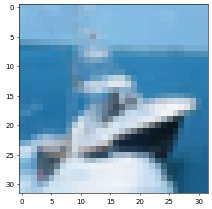

In [11]:
plt.figure(figsize =(8,5),dpi=50)
plt.imshow(x_train[8]);

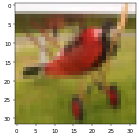

In [12]:
plt.figure(figsize =(6,4),dpi=40)
plt.imshow(x_train[35]);

##  **Preprocessing**



In [13]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_train.max()

255

In [16]:
x_train = x_train/255  # Normalizing

In [17]:
x_test = x_test/255

In [18]:
x_test.shape

(10000, 32, 32, 3)

## **Labelling the data.**



In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train.shape

(50000, 1)

In [21]:
y_train[0]

array([6], dtype=uint8)

In [22]:
y_cat_train = to_categorical(y_train,10)

In [23]:
y_cat_train.shape

(50000, 10)

In [24]:
y_cat_train[0]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [25]:
y_cat_test = to_categorical(y_test,10)

In [26]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## **Building the Model.**

In [27]:
#Building the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

## **Sequential Modelling**

In [28]:
model = Sequential()

## **Building Convolution Layers.**


### **Steps in creating the Convolution layers.**



1.   **model.add()** - argument that adds the layer to the model.

1.   **.add(conv2D())** - Adding the convolution layer so conv2D

1.  **conv2D()** - consist of arguments


*   **filters** : has the count of feature maps you desire for.

*   **Kernal_size()**: in matrix (3X3)

*   **Activation function("relu")**: Takes the negative values as zero and the positive values remains the same.

*   **input_shape()**: contains  image pixcel height and width (32X32) and the nature of picture. Here 3 defines the color image (RGB).











In [29]:
# FIRST SET OF CONVOLUTION LAYER

model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))



### **Pooling the Layer**

The Arguments in Maxpooling.

**.add(MaxPool2D()):** Adding the function MaxPool2D() to the layer.

**MaxPool2D() :** holds the pooling size in matrix form. Here pool_size is 2x2

In default the pooling size is taken to be in even matrix.


In [30]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

## **Laying the Second Layer.**

In Second Layer, if the filters is increased to 64 then number of data taken to train gets increased (i.e., 18496 out of 50,000.)

Maxpooling output matrix is 6X6 



In [31]:
## SECOND SET OF CONVOLUTION LAYERS

model.add(Conv2D(filters = 64, kernel_size = (3,3),
                  activation = 'relu'))

In [32]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

## **Laying the Third Layer.**

In Third Layer, if the filters is increased to 128 then number of data taken to train gets increased (i.e., 73,856 out of 50,000.)

Maxpooling output matrix is 6X6 



In [33]:
## THIRD SET OF CONVOLUTION LAYERS

model.add(Conv2D(filters =128, kernel_size = (3,3),activation = 'relu'))

In [34]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

## **Flattening the layer**

Converting the 2D layers to 1D layer (vectors)


In [35]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

## **Creating Dense Layer**

**Connecting the previous convo-layers.**

**Dense()** - dense layer contains densely connected neurons. 

The neurons in the dense layer get their source of input data from all the other neurons of the previous layer of the network.

Here,

300 : represents the No of neurons in the hidden layer.

In [36]:
# 300 Neurons in dense hidden layer ()
model.add(Dense(300,activation = 'relu'))

## **Introducing Classifier layer**

Since the dataset is categorical in nature we call the classifier at the final layer.

using Dense() connecting all the previous layer to the clasifier

Arguments in the classifier.


*  10:  No.of classes in the dataset. Here it is 10

*   activation function: 

    since the classifier is the final layer we use softmax as our activation function.

     **why softmax?**

        Because it highlights the largest values and suppresses values which are significantly below the maximum value, though this is not true for small values.

        It normalizes the outputs so that they sum to 1 so that they can be directly treated as probabilities over the output. 





In [37]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

## **Compiling the Layers**




*   Optimizer - **rmsprop**:  Root Mean Square Propagation, is a gradient descent optimization algorithm.


  **why rmsprop?**

      Because it does not decay the learning rate too quickly preventing convergence.
  
*   loss - **Categorical crossentropy** : loss function used in multi-class classification tasks.





In [38]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## **Model Summary**

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0


## **Early Stopping**

**Early Stopping** - call back technique that monitors the Val_loss.

  **Patience** - determines the level of patience when the same value count occurs again and again. 

    Here, After 5th time the same val_loss occurs it stops. 

In [40]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

## **Fitting the model**

under model Fitting,

*   **validation_data :** validates the x_test and y_categorical test

*   **callbacks:** Here it's Early_stop. so the moves backs stops at the early stage of same value occurance.

*   **epochs :** No. of runs in the layers


In [41]:
model.fit(x_train, y_cat_train, epochs =10,
          validation_data = (x_test,y_cat_test),callbacks =[early_stop])

Epoch 1/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5141 - accuracy: 0.4527 - val_loss: 1.3491 - val_accuracy: 0.5310
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1020 - accuracy: 0.6150 - val_loss: 1.0723 - val_accuracy: 0.6287
Epoch 3/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.9210 - accuracy: 0.6811 - val_loss: 0.9314 - val_accuracy: 0.6835
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8172 - accuracy: 0.7198 - val_loss: 0.9849 - val_accuracy: 0.6654
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.7557 - accuracy: 0.7432 - val_loss: 1.0201 - val_accuracy: 0.6544
Epoch 6/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.7197 - accuracy: 0.7568 - val_loss: 1.1855 - val_accuracy: 0.6565
Epoch 7/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7021 - accuracy: 0.7655 - val_loss: 0.940

## **Saving the model's epoch.**




*   file name: 'cifar_10epochs'

*   file format: .h5




In [42]:
model.save('cifar_10epochs.h5')

## **Tabulating the Losses and Accuracy**

Creating a dataframe on losses,accuracy of model and the losses,accuracy of validation

In [43]:
losses = pd.DataFrame(model.history.history)

## **Analysing**

On Observing the below table, it is revealed that, at each epoch the accuray rate increases with increase in Val_Accuray.

Also, the losses and the val_losses fluctuates between 0 to 1

In [87]:
losses.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.514093,0.45268,1.349080,0.5310
1,1.102009,0.61500,1.072309,0.6287
2,0.921023,0.68108,0.931418,0.6835
3,0.817212,0.71982,0.984945,0.6654
4,0.755704,0.74320,1.020067,0.6544
5,0.719680,0.75684,1.185546,0.6565
6,0.702082,0.76554,0.940621,0.6810
7,0.696076,0.76956,0.966379,0.7162


## **Plotting - Accuray vs Val_accuracy**

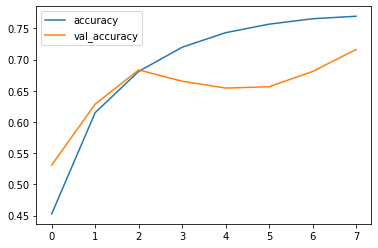

In [88]:
losses[['accuracy','val_accuracy']].plot();

### **Interpretation: Accuracy**

As the accuracy value gradually increases to 0.76956, the Validation Accuracy intersects approximately at 0.68 and lower then raise to 0.7162.

This shows that if the epoch or more layers added the accuracy rates keeps increasing.

## **Plotting - Loss Vs Val_loss**

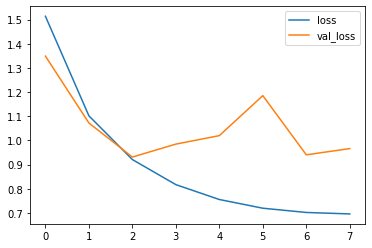

In [46]:
losses[['loss','val_loss']].plot();

### **Interpretation: Loss**

The loss gradually decreases as the epoch count is increased.

The Validation loss fluctuates as the epochs increased.

This shows that if the epoch or more layers added the loss rates keeps decreases.

In [47]:
model.metrics_names

['loss', 'accuracy']

## **Evaluating the metrics**

Evaluating the loss and accuracy of the categorical testing data.

Overall loss and accuracy for the model is given below.

In [48]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[0.9663791060447693, 0.7161999940872192]


## **Predicting the Classes.**

In [49]:

predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 7s 23ms/step


## **Constructing Classification Metrics**

In [50]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.85      0.85      0.85      1000
           2       0.62      0.65      0.64      1000
           3       0.46      0.64      0.54      1000
           4       0.70      0.65      0.68      1000
           5       0.63      0.62      0.63      1000
           6       0.82      0.76      0.79      1000
           7       0.85      0.64      0.73      1000
           8       0.84      0.76      0.80      1000
           9       0.85      0.78      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



## **Confusion Matrix**

In [51]:
confusion_matrix(y_test,predict_classes)

array([[800,  12,  51,  29,  11,   9,   9,   6,  49,  24],
       [ 28, 851,   4,  11,   4,   4,   9,   4,  27,  58],
       [ 63,   3, 654, 108,  58,  50,  40,  12,   8,   4],
       [ 22,   6,  74, 643,  48, 137,  40,  10,   9,  11],
       [ 29,   1,  87, 112, 654,  39,  28,  40,   8,   2],
       [ 17,   5,  52, 222,  28, 623,  21,  23,   4,   5],
       [ 12,   5,  52,  96,  48,  19, 759,   7,   1,   1],
       [ 25,   3,  45, 111,  70,  86,   5, 641,   4,  10],
       [111,  35,  23,  29,   4,  10,   4,   3, 762,  19],
       [ 45,  75,  10,  37,   4,   8,   7,   8,  31, 775]])

## **Correlation**

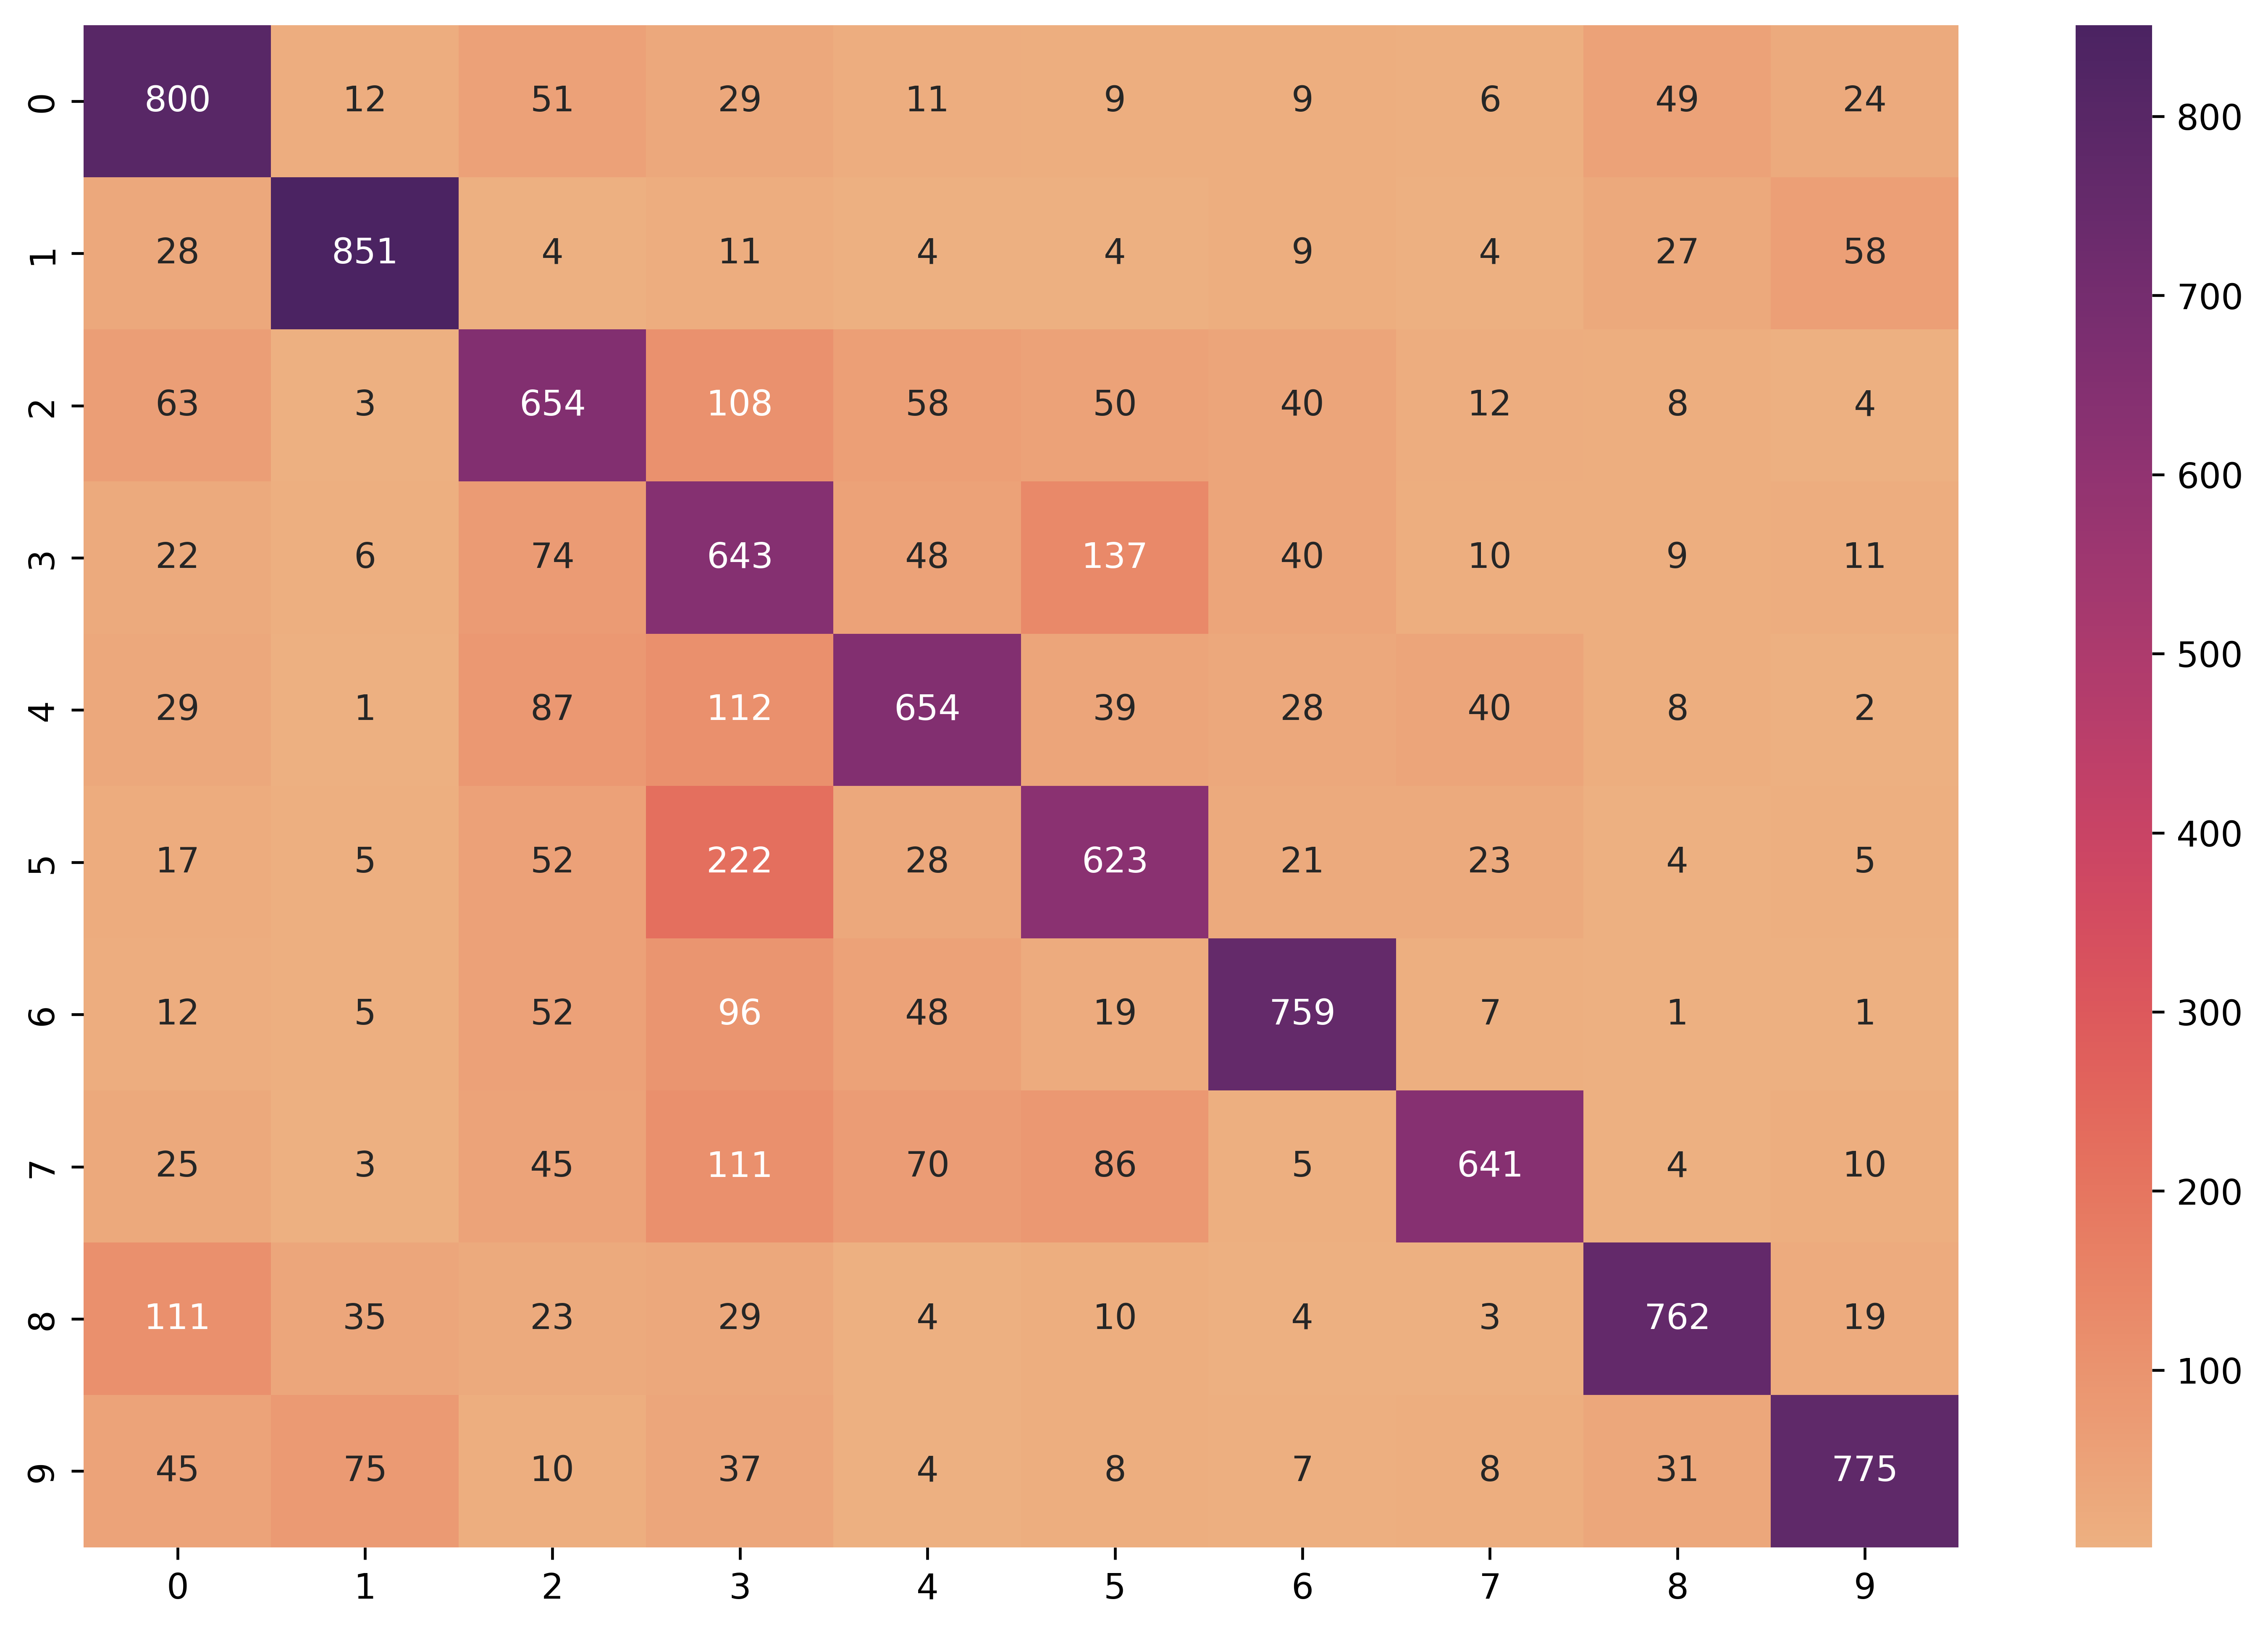

In [52]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="flare", annot=True, fmt='g');

## **Interpretation : Correlation**

correlation displays the relationship between the y_test and predict classes in CIFA 10.

As the CIFAR-10 has 10 classes, each classes relationship is displayed above.

Among 10 Classes,

    Perfect correlation(900-700)

    0: Aircraft
    1: Automobile
    6: Frog
    8: Ship
    9: Truck

    Good Correlation (700-600)[slightly confused.]
    2: Bird
    3: Cat
    4: Deer
    5: Dog.
    7: Horse.



## **Checking for the correctness of Predictions.**

Lets observe how correctly the images are predicted when the random x_test() images are generated.

### **EXAMPLE :1**

**Randomly calling the images by changing the x_test() values.**

In [53]:
my_image = x_test[800]

Plotting the image called by **imshow()**

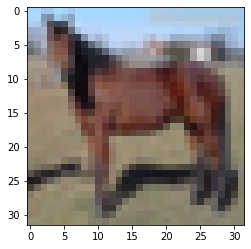

In [54]:
plt.imshow(my_image)

### **Predicting the images and its right classes.**

**set_printoptins()** : function - used - set printing options. 

    These options determine the way floating point numbers, arrays and other NumPy objects are displayed. 

**formatter{}** : Declares the final with strea output formats.


In [55]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 23ms/step


array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 1.000000, 0.000000, 0.000000]], dtype=float32)

### **EXAMPLE 2**

In [82]:
my_image = x_test[2388]

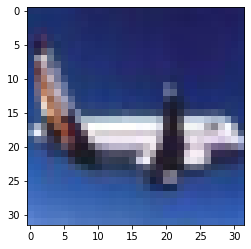

In [83]:
plt.imshow(my_image)

In [84]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 25ms/step


array([[0.999136, 0.000003, 0.000699, 0.000012, 0.000092, 0.000000,
        0.000000, 0.000000, 0.000056, 0.000002]], dtype=float32)

### **EXAMPLE 3**

In [76]:
my_image = x_test[8787]

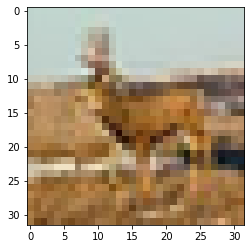

In [77]:
plt.imshow(my_image)

In [78]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 23ms/step


array([[0.003588, 0.000000, 0.001214, 0.000002, 0.995184, 0.000000,
        0.000001, 0.000008, 0.000002, 0.000001]], dtype=float32)

### **EXAMPLE 4**

In [65]:
my_image = x_test[6789]

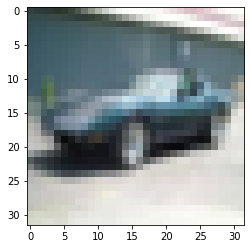

In [66]:
plt.imshow(my_image)

In [67]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 124ms/step


array([[0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000]], dtype=float32)

## **Conclusion.**

 From the above examples, 

 1. **Image 1** -**Horse** is correctly predicted whose accuracy rate is 1 and belongs to the **class 7**.

 2.Image 2 -Accuracy rate is **0.999136** which belongs to the class **aircraft(0)**. 

 3. Image3 - Accuracy rate is **0.995184** which belongs to the class **deer(4)**. 

 4. Image4 - Accuracy rate is predicted as **1.000000** which belongs to the class **Automobiles (1)**. 

Hence the Model is predicting the images and their respective classes justly.